<a href="https://colab.research.google.com/github/dustyattenborough/lectures-bigphys/blob/master/FDMex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from google.colab import files
import os
import torch
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter


In [ ]:
## 경계까지 하면 격자의 갯수는 N+2 by N+2
## 내부 격자의 갯수는 NxN개임
# 10 10 10 ...10 10
# 0  0  0  ... 0 0 
# .  .  .  .,, , .
# 0  0  0  ... 0 0
# 10 10 10 ...10 10
#############################

N=40
dh=1/N
nlist=[i+1 for i in range(N)]
Potential=[]
dotcharge=[]
Potential.append([10 for i in range(N+2)])
dotcharge.append([0 for i in range(N+2)])
for j in range(N):
  Potential.append([0 for i in range(N+2)])
  dotcharge.append([0 for i in range(N+2)])
Potential.append([10 for i in range(N+2)])
dotcharge.append([0 for i in range(N+2)])
#for kk in range(N):
  #Potential[kk][0]=10
  #Potential[kk][N+1]=10
#dotcharge[20][20]=-50000 # dotcharge>10: minus charge
#dotcharge[30][30]=-100000

In [ ]:
# h=1/N
NN=1000 #시행횟수
Pot=[]
for tt in range(NN):
  for k in range(N):  #상하
    if tt==0:
      Pot.append([])
    for w in range(N): #좌우
      Potential[k+1][w+1]=round((Potential[k+1+1][w+1]+Potential[k+1-1][w+1]+Potential[k+1][w+1+1]+Potential[k+1][w+1-1]-dh*dh*dotcharge[k+1][w+1])/4,9)
      Pot[k].append(Potential[k+1][w+1])

In [ ]:

x=[]
y=[]
z=[]

for q0 in range(N+2): #상하
  for q1 in range(N+2): #좌우
    if q0==0 and q0==N+1:
      z.append(10)
    elif q1==0 and q1==N+1:
      z.append(0)
    else:  
      z.append(1*Potential[q1][q0])
    x.append(q1)
    y.append(q0)

xn=np.array(x)
yn=np.array(y)
zn=np.array(z)


In [ ]:
len(yn)

1764

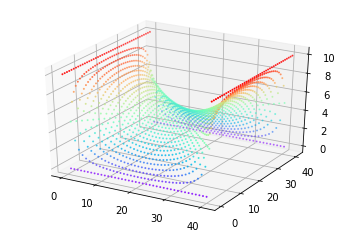

In [ ]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xn,yn,zn,s=1,c=zn, cmap='rainbow')


plt.show()